TensorFlow is one of the leading ML frameworks to implementing deep learning algorithms (with the other popular tool being PyTorch). It is implemented by Google. In 2019, Google integrated Keras into Tensorflow and erleased Tensorflow 2.0. Keras is a framework developed independently be Francois Chollet that creates a simple, lyaer-centric interface to Tensorflow. 


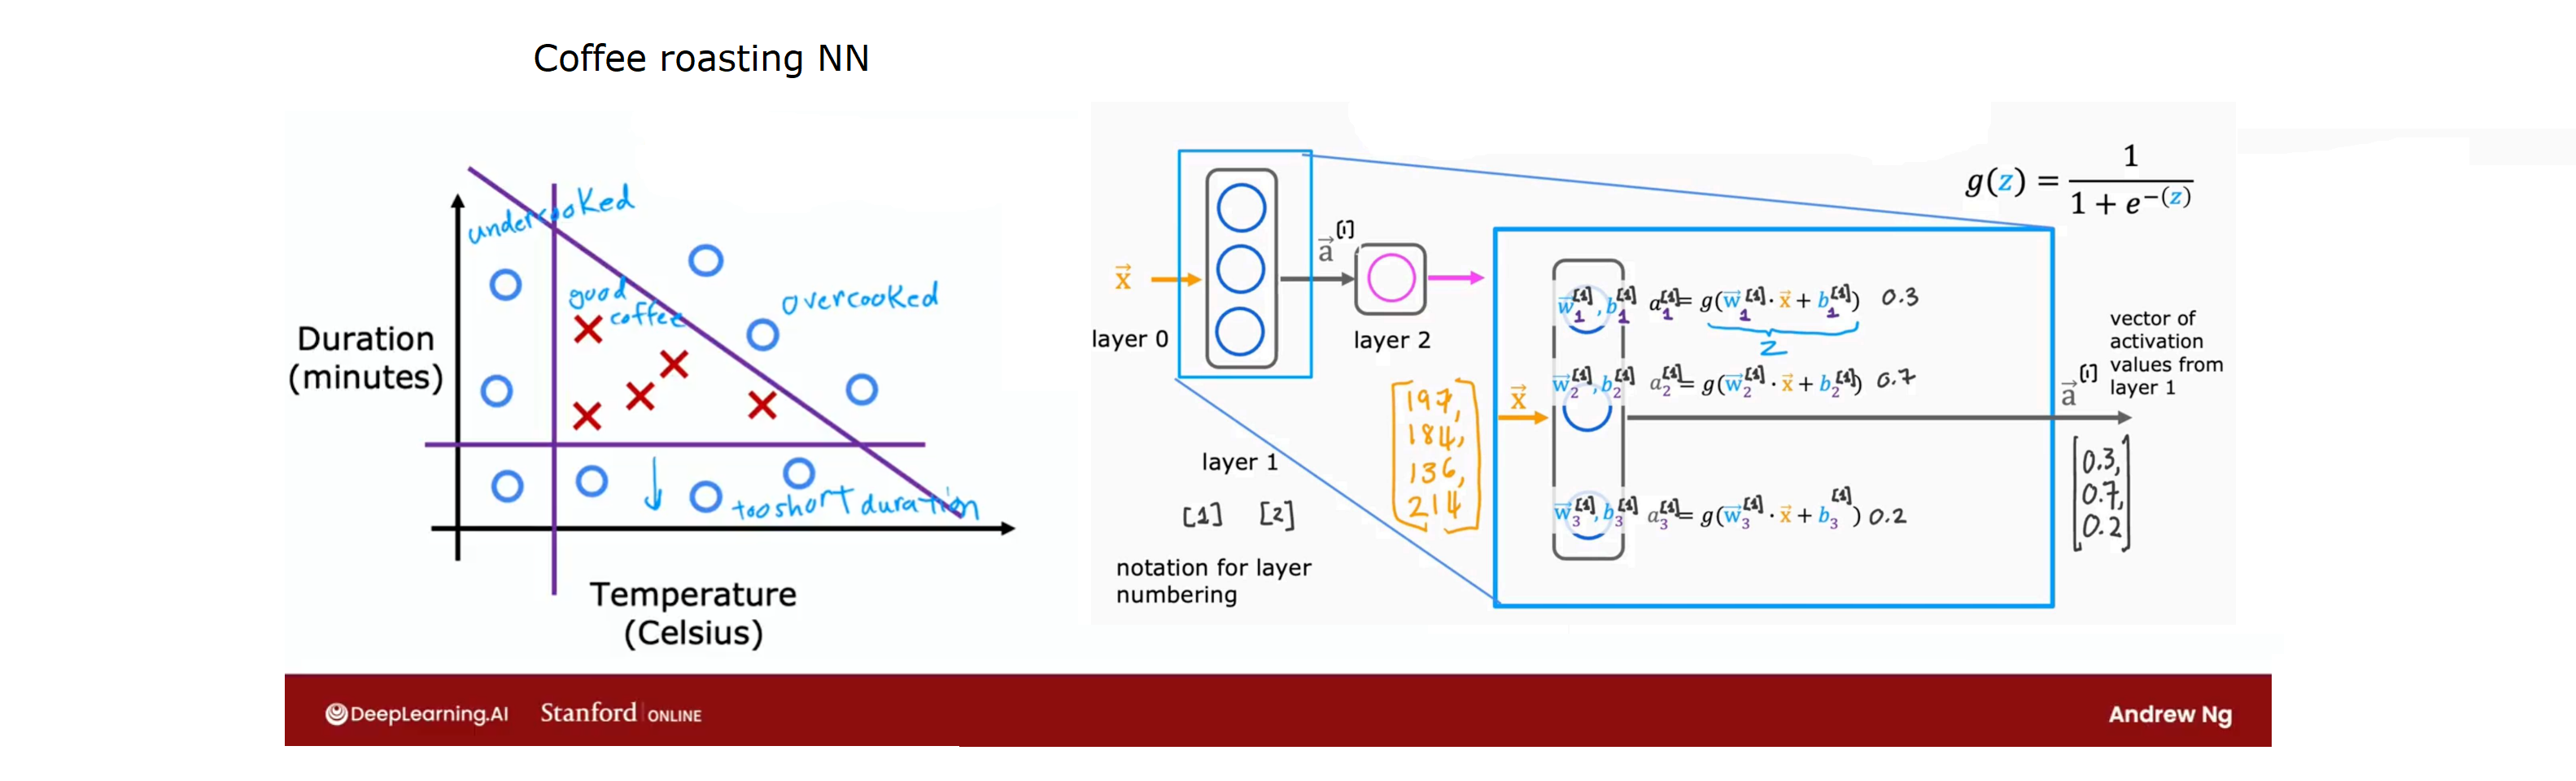
Simple example with an NN for optimizing the quality of the beans in a coffee roasting process:
* The dataset contains:
   * Two input parameters: the temperature at which the raw coffee beans are heated to turn them into nicely roasted coffee beans, and the duration of roasting.
   * A label showing whether this setting ot temperature and duration roasted a good-tasting coffee.
* Given a feature vector $x$ with both temperature and duration, the model should infer whether or not the setting will result in good coffee.
* Same task can be solved with logistic regression, hence using the sigmoid as an activation function for the hidden layer in this NN is suitable.
   

#### Data normalization

* Fitting the weights to the data (note: weights are computed with back-propagation) will proceed more quickly if the data is normalized to have a similar range.
* Normalization can be done with Keras "Normalization Layer" (note: Keras is an open-source library integrated into the TensorFlow library)
* Normalization applied here is not a layer in the model itself.
* It is important also to apply normalization to any future data that utilizes the learned model.
  
> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization  
> This layer will shift and scale inputs into a distribution centered around 0 with standard deviation 1. It accomplishes this by precomputing the mean and variance of the data, and calling (input - mean) / sqrt(var) at runtime.
The mean and variance values for the layer must be either supplied on construction or learned via adapt(). adapt() will compute the mean and variance of the data and store them as the layer's weights. adapt() should be called before fit(), evaluate(), or predict().

>Note: Standard deviation quantifies the dispersion of data points around the mean (average). A low value indicates that the data points are clustered closely around the mean, while a high value suggests the data points are more dispersed. Standard deviation allows for comparison of the variability within different sets of data.  

```python
# A preprocessing layer which normalizes continuous features
normalization_layer = tf.keras.Normalization(axis=-1) # Defaults to -1 i.e. the last axis (feature dimention)
normalization_layer.adapt(X)  # Learn mean, variance  
X_normalized = normalized_layer(X)  # Apply normalization
```  

#### Modeling and prediction

* Bulding the model with Tensorflow will utilize 2 more layers in addition to the input layer - a hidden layer with 3 neurons and an output layer. Both of them will use sigmoid as activation function.
* The number of neurons in a hidden layer is a matter of choice of NN architecture and is base on the complexity of the problem.
   * It is tunned experimentally (via cross-validation).
   * As a general rule it determines the model capacity: More neurons = higher capacity to learn complex patterns. Too few → underfitting; too many → overfitting.
* In this case, the hidden layer with 3 neurons is used to learn the 3 different types (classes) of 'not well roasted' beans  - undercooked due to too low temperature, undercooked due to too short duration, and overcooked.
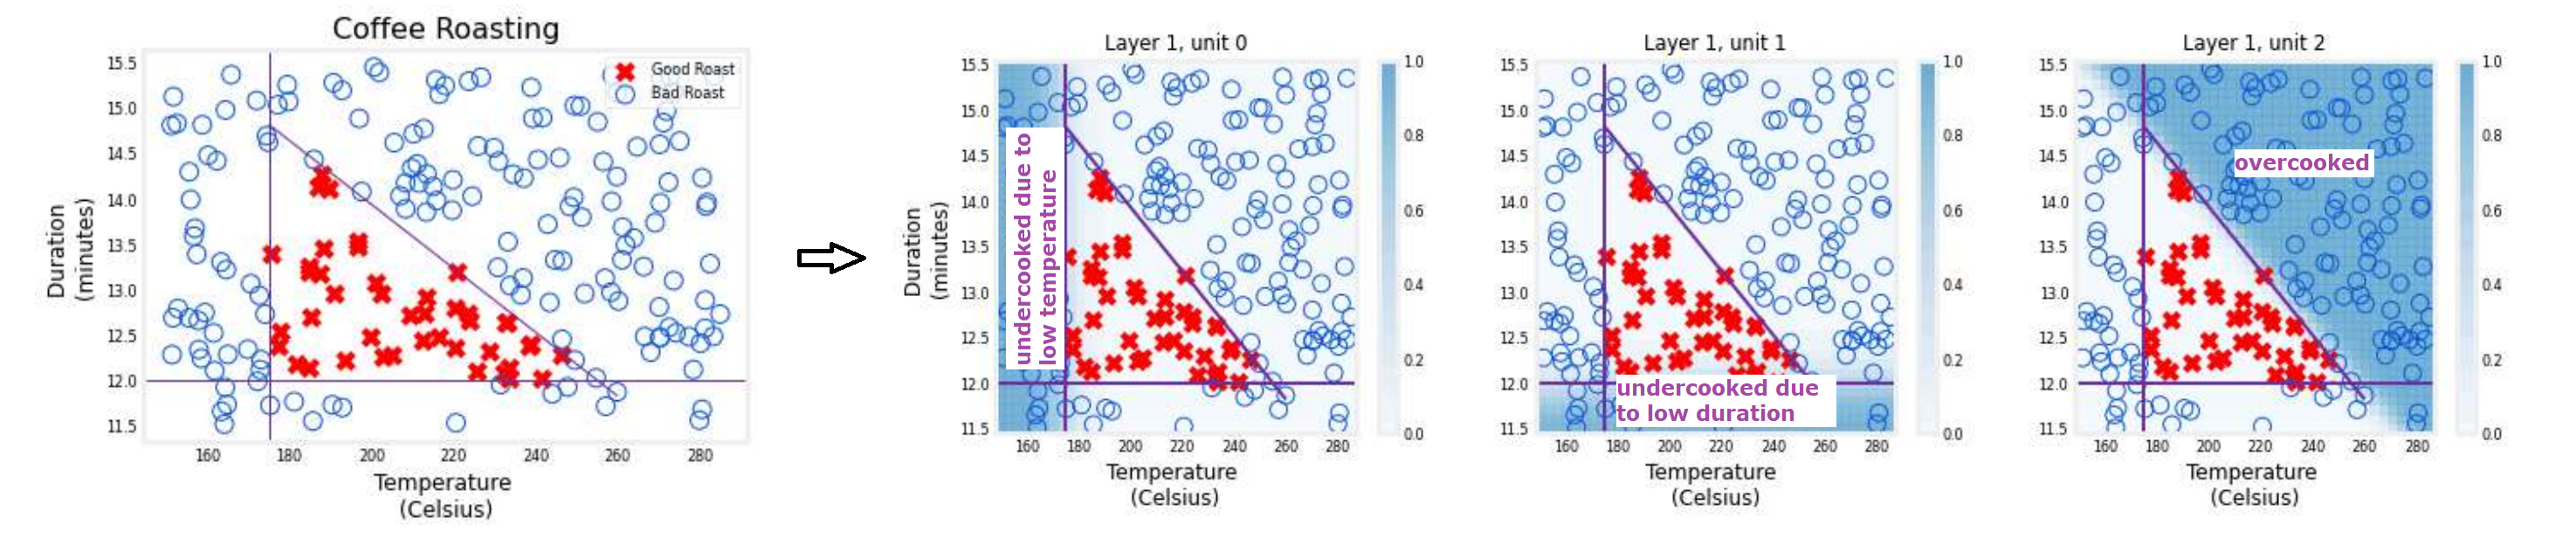  

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Simple model with 2 input features, 3 neurons in hidden layer, and 1 output
model = Sequential([
    Input(shape=(2,)),
    Dense(3, input_shape=(2,), activation='sigmoid'),  # hidden layer
    Dense(1)  # output layer; do not include sigmoid activation here to improve computation stability for very small or large feature values   
])

model.compile(
    optimizer=Adam(learing_rate=0.1), 
    loss=BinaryCrossentropy(from_logits=True)  # this tells the loss to apply sigmoid itself; logits = raw output
)

model.fit(X_train, y_train, epochs=10)

prediction = model.predict(X_test) # X_test must be normalized, as is X_train
```

* $Dense$ means fully connected — each neuron in the layer receives input from all neurons in the previous layer.
* $Sequential$ builds a linear stack of layers, where the model flow is layer-by-layer, from input to output.
* The combination of Dense and Sequential builds a chain of layers where the output of one layer becomes input of the next.
* $Input(shape=2,))$ specifies the expected shape of the input, allowing Tensorflow to size the the weights and bias parameters at this point. This can be ommited in practice, when the input data is specified with $model.fit$ instead.
* Including explicitely the sigmoid activation in the final layer is not considered best practice. It's better allow it to be accounted for in the loss, which improves numerical stability.
   * sigmoid_cross_entropy_with_logits(logits=x, labels=y) function compute sigmoid by combining the math in a way that is numerically stable, using algebraic tricks
* Fitting updates the weights of the model. 
* The outputed $prediction$ is a probability to which a threshold must be applied for final decision if the beans a roasted well.